
<h1 style="
background: linear-gradient(90deg, #00c6ff, #0072ff);
color: black;
padding: 15px;
border-radius: 12px;
text-align:center;
font-weight:bold;
animation: slide 1s ease-out;">
    📘 CREDIT CARD DATA
</h1>

<style>
@keyframes slide {
  from { transform: translateX(-300px); opacity: 0; }
  to   { transform: translateX(0); opacity: 1; }
}
</style>




<h1 style="
background: linear-gradient(90deg, #ff512f, #f09819);
color: white;
padding: 18px;
border-radius: 20px;
text-align: center;
font-weight: bold;
box-shadow: 0 0 25px rgba(255,81,47,0.7);
animation: glowFade 1.5s ease;">
IMPORT LIBRARIES,ALGORITHMS AND METRICS
</h1>

<style>
@keyframes glowFade {
  from { opacity: 0; transform: scale(0.85); }
  to   { opacity: 1; transform: scale(1); }
}
</style>



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings("ignore")


<h1 style="
background: linear-gradient(90deg, #ff512f, #f09819);
color: white;
padding: 18px;
border-radius: 20px;
text-align: center;
font-weight: bold;
box-shadow: 0 0 25px rgba(255,81,47,0.7);
animation: glowFade 1.5s ease;">
LOADIING CREDICT CARD DATASET
</h1>

<style>
@keyframes glowFade {
  from { opacity: 0; transform: scale(0.85); }
  to   { opacity: 1; transform: scale(1); }
}
</style>



In [2]:
data=pd.read_csv(r"C:\Users\HP\Downloads\CC GENERAL.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
import pandas as pd

data_description = pd.DataFrame({
    "Column Name": [
        "CUST_ID", "BALANCE", "BALANCE_FREQUENCY", "PURCHASES",
        "ONEOFF_PURCHASES", "INSTALLMENTS_PURCHASES", "CASH_ADVANCE",
        "PURCHASES_FREQUENCY", "ONEOFF_PURCHASES_FREQUENCY",
        "PURCHASES_INSTALLMENTS_FREQUENCY", "CASH_ADVANCE_FREQUENCY",
        "CASH_ADVANCE_TRX", "PURCHASES_TRX", "CREDIT_LIMIT",
        "PAYMENTS", "MINIMUM_PAYMENTS", "PRC_FULL_PAYMENT",
        "TENURE", "cluster"
    ],
    "Description": [
        "Unique ID for each customer",
        "Current balance on the credit card",
        "How frequently the balance is updated",
        "Total amount of purchases",
        "Amount spent on one-time purchases",
        "Amount spent on installment purchases",
        "Cash withdrawn using the credit card",
        "Frequency of purchase transactions",
        "Frequency of one-time purchases",
        "Frequency of installment purchases",
        "Frequency of cash advances",
        "Number of cash advance transactions",
        "Number of purchase transactions",
        "Maximum credit limit of the customer",
        "Total payments made by the customer",
        "Minimum payment amount",
        "Percentage of full payments made",
        "Number of months as a customer",
        "Cluster label from K-Means"
    ]
})

data_description


,Column Name,Description
0,CUST_ID,Unique ID for each customer
1,BALANCE,Current balance on the credit card
2,BALANCE_FREQUENCY,How frequently the balance is updated
3,PURCHASES,Total amount of purchases
4,ONEOFF_PURCHASES,Amount spent on one-time purchases
5,INSTALLMENTS_PURCHASES,Amount spent on installment purchases
6,CASH_ADVANCE,Cash withdrawn using the credit card
7,PURCHASES_FREQUENCY,Frequency of purchase transactions
8,ONEOFF_PURCHASES_FREQUENCY,Frequency of one-time purchases
9,PURCHASES_INSTALLMENTS_FREQUENCY,Frequency of installment purchases


# DROP THE COLUMNS

In [4]:
data = data.drop(columns=['CUST_ID','TENURE'])

In [5]:
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000



<h1 style="
background: linear-gradient(90deg, #ff512f, #f09819);
color: white;
padding: 18px;
border-radius: 20px;
text-align: center;
font-weight: bold;
box-shadow: 0 0 25px rgba(255,81,47,0.7);
animation: glowFade 1.5s ease;">
Check shape,columns,info and missingvalues handling
</h1>

<style>
@keyframes glowFade {
  from { opacity: 0; transform: scale(0.85); }
  to   { opacity: 1; transform: scale(1); }
}
</style>



In [6]:
data.shape

(8950, 16)

In [7]:
data.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [8]:
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median())
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median())

In [9]:
data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [11]:
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'],
      dtype='object')

In [12]:
cp_data=data.copy()


<h1 style="
background: linear-gradient(90deg, #ff512f, #f09819);
color: white;
padding: 18px;
border-radius: 20px;
text-align: center;
font-weight: bold;
box-shadow: 0 0 25px rgba(255,81,47,0.7);
animation: glowFade 1.5s ease;">
SCALING
</h1>

<style>
@keyframes glowFade {
  from { opacity: 0; transform: scale(0.85); }
  to   { opacity: 1; transform: scale(1); }
}
</style>



In [13]:
from sklearn.preprocessing import MinMaxScaler


In [14]:
scaled=MinMaxScaler().fit_transform(data)

In [15]:
scaled

array([[2.14779454e-03, 8.18182000e-01, 1.94536779e-03, ...,
        3.97863135e-03, 1.82564563e-03, 0.00000000e+00],
       [1.68169097e-01, 9.09091000e-01, 0.00000000e+00, ...,
        8.08933873e-02, 1.40344791e-02, 2.22222000e-01],
       [1.31026136e-01, 1.00000000e+00, 1.57662475e-02, ...,
        1.22643641e-02, 8.20961806e-03, 0.00000000e+00],
       ...,
       [1.22871936e-03, 8.33333000e-01, 2.94456089e-03, ...,
        1.60229492e-03, 1.07843629e-03, 2.50000000e-01],
       [7.06688341e-04, 8.33333000e-01, 0.00000000e+00, ...,
        1.03604933e-03, 7.29475795e-04, 2.50000000e-01],
       [1.95717777e-02, 6.66667000e-01, 2.22932216e-02, ...,
        1.24533826e-03, 1.15527021e-03, 0.00000000e+00]])

In [16]:
scaled=pd.DataFrame(scaled,columns=data.columns)

In [17]:
scaled

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000
3,0.087521,0.636364,0.030567,0.036775,0.000000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.004088,0.000000
4,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.001496,1.000000,0.005936,0.000000,0.012939,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.006419,0.000640,0.500000
8946,0.001007,1.000000,0.006118,0.000000,0.013333,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.005439,0.004088,0.000000
8947,0.001229,0.833333,0.002945,0.000000,0.006418,0.000000,0.833333,0.000000,0.666667,0.000000,0.00000,0.013966,0.031720,0.001602,0.001078,0.250000
8948,0.000707,0.833333,0.000000,0.000000,0.000000,0.000776,0.000000,0.000000,0.000000,0.111111,0.01626,0.000000,0.015025,0.001036,0.000729,0.250000



<div style="
    border-left:10px solid #2e7d32;
    padding:10px 14px;color:black; 
    font-size:30px;
    font-weight:800;
    background:#e8f5e9;
">
   K-MEANS CLUSTERING
</div>



In [18]:
from sklearn.cluster import KMeans

  File "C:\Users\HP\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\HP\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\anaconda3\Lib\subprocess.py", line 15

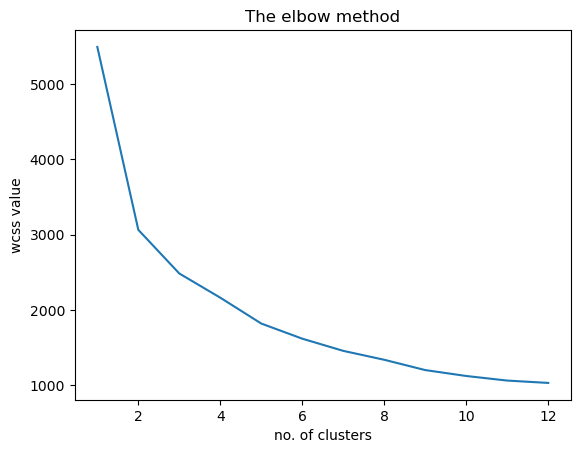

In [19]:
wcss=[]
for i in range(1,13):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)#random initialization method
    kmeans.fit(scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,13),wcss)
plt.title('The elbow method')
plt.xlabel('no. of clusters')
plt.ylabel('wcss value')
plt.show()


In [20]:
# data=data.values

In [21]:
type(scaled)

pandas.core.frame.DataFrame

In [22]:
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=42)#random initialization method
y_kmeans=kmeans.fit_predict(scaled)

In [23]:
y_kmeans

array([0, 0, 1, ..., 1, 0, 0], dtype=int32)

In [24]:
from sklearn.metrics import silhouette_score
score1 = silhouette_score(scaled, y_kmeans)

print("Silhouette Score:", score1)

Silhouette Score: 0.4136247848462188


In [25]:
from sklearn.decomposition import PCA

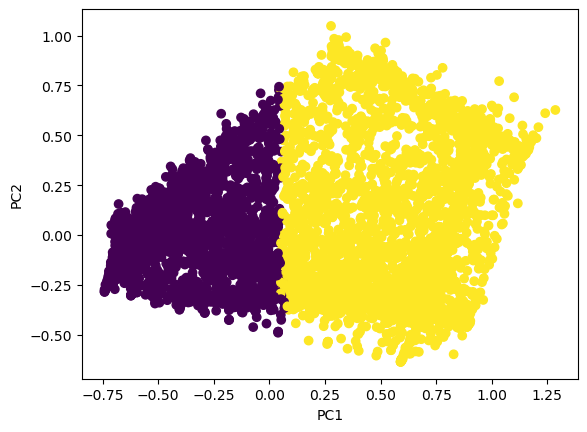

In [26]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled)

plt.scatter(reduced[:,0], reduced[:,1], c=kmeans.labels_)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [27]:
new_data=[[0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000]]

In [28]:
new_data

[[0.002148,
  0.818182,
  0.001945,
  0.0,
  0.00424,
  0.0,
  0.166667,
  0.0,
  0.083333,
  0.0,
  0.0,
  0.005587,
  0.03172,
  0.003979,
  0.001826,
  0.0]]

In [29]:
predict=kmeans.predict(new_data)

In [30]:
predict

array([0], dtype=int32)

<div style="
    border-left:10px solid #2e7d32;
    padding:10px 14px;color:black; 
    font-size:30px;
    font-weight:800;
    background:#e8f5e9;
">
   DBSCAN
</div>

In [31]:
epsilon=0.5
min_samples=5
dbscan=DBSCAN(eps=epsilon,min_samples=min_samples)
labels=dbscan.fit_predict(scaled)

In [32]:
labels

array([0, 0, 0, ..., 0, 0, 0])

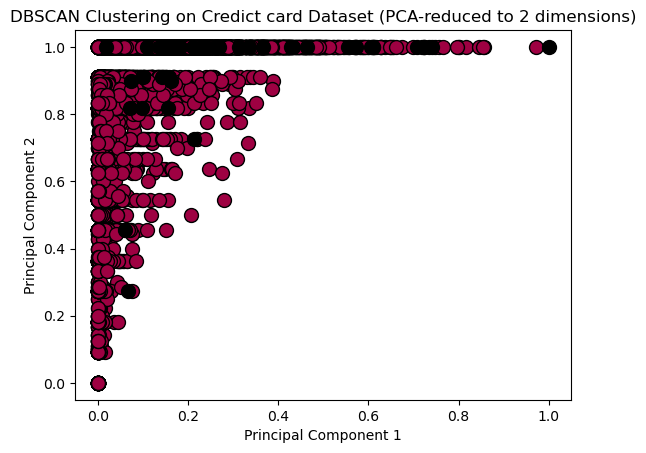

In [33]:
unique_labels=set(labels)
colors=[plt.cm.Spectral(each)for each in np.linspace(0,1,len(unique_labels))]
for k,col in zip(unique_labels, colors):
    if k==-1:
        col =[0,0,0,1]
    class_member_mask=(labels==k)
    xy = scaled[class_member_mask].values
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10)
plt.title("DBSCAN Clustering on Credict card Dataset (PCA-reduced to 2 dimensions)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [34]:
from sklearn.metrics import silhouette_score
score3 = silhouette_score(scaled, labels)
print('silhouette Score:',score3)

silhouette Score: 0.3706281373020104


<div style="
    border-left:10px solid #2e7d32;
    padding:10px 14px;color:black; 
    font-size:30px;
    font-weight:800;
    background:#e8f5e9;
">
HIERARCHICAL CLUSTERING</div>


In [35]:
import scipy.cluster.hierarchy as sch

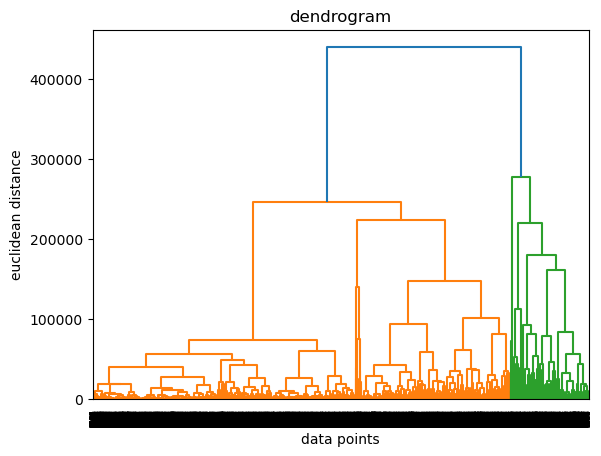

In [36]:
dendrogram=sch.dendrogram(sch.linkage(data,method='ward'))
plt.title('dendrogram')
plt.xlabel('data points')
plt.ylabel('euclidean distance')
plt.show()

In [37]:
from sklearn.cluster import AgglomerativeClustering

In [38]:
ahc=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
y_ahc=ahc.fit_predict(scaled)
y_ahc

array([1, 1, 0, ..., 0, 1, 1])

In [39]:
from sklearn.metrics import silhouette_score
sil_ahc=silhouette_score(scaled,y_ahc)

In [40]:
sil_ahc

np.float64(0.39549939559679714)

<div style="
    border-left:10px solid #2e7d32;
    padding:10px 14px;color:black; 
    font-size:30px;
    font-weight:800;
    background:#e8f5e9;
">
FUZZY CLUSTERING</div>


In [41]:
import skfuzzy as fuzz

In [42]:
data = scaled.values.T        # transpose ONLY for cmeans
cntr, u, *_ = fuzz.cluster.cmeans(data, c=2, m=2, error=0.005, maxiter=1000)

Hard_cluster = np.argmax(u, axis=0)  # length = number of samples (8950)


In [43]:
from sklearn.metrics import silhouette_score

print("Silhouette Score:", silhouette_score(scaled, Hard_cluster))


Silhouette Score: 0.41342038022306943


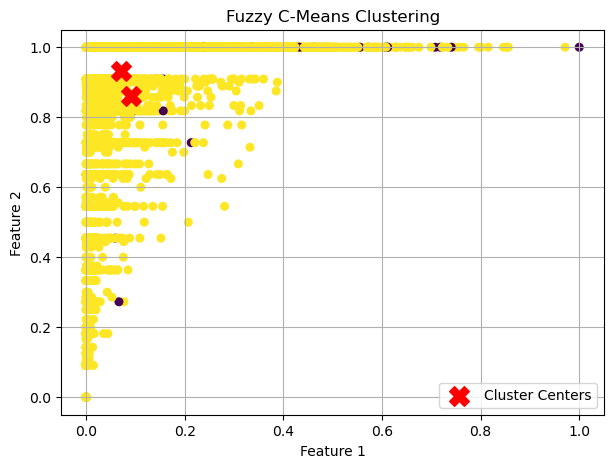

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))

plt.scatter(
    data[ 0],        # feature 1
    data[1],        # feature 2
    c=labels,       # correct length (8950)
    cmap='viridis',
    s=30
)

# cluster centers (first 2 features)
plt.scatter(
    cntr[:, 0],
    cntr[:, 1],
    c='red',
    marker='X',
    s=200,
    label='Cluster Centers'
)

plt.title("Fuzzy C-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


<div style="
    border-left:10px solid #2e7d32;
    padding:10px 14px;color:black; 
    font-size:30px;
    font-weight:800;
    background:#e8f5e9;
">
TABULATE</div>


In [45]:
from tabulate import tabulate
from sklearn.metrics import r2_score

table = [
    ['Clustering method', 'siloutscore'],
    ['kmeans',score1],
    ['DBSCAN', score3],
    ['Agglomerative',sil_ahc],
    ['fuzzy c-means',  silhouette_score(scaled, Hard_cluster)]
]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))


╒═════════════════════╤═══════════════╕
│ Clustering method   │   siloutscore │
╞═════════════════════╪═══════════════╡
│ kmeans              │      0.413625 │
├─────────────────────┼───────────────┤
│ DBSCAN              │      0.370628 │
├─────────────────────┼───────────────┤
│ Agglomerative       │      0.395499 │
├─────────────────────┼───────────────┤
│ fuzzy c-means       │      0.41342  │
╘═════════════════════╧═══════════════╛


In [46]:
cp_data['cluster']=y_kmeans
cp_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,1
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,1
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,0


In [47]:
cluster1=cp_data.loc[cp_data['cluster']==0]

In [48]:
cluster2=cp_data.loc[cp_data['cluster']==1]

In [49]:
cluster1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
count,4925.000000,4925.000000,4925.000000,4925.000000,4925.000000,4925.000000,4925.000000,4925.000000,4925.000000,4925.000000,4925.000000,4925.000000,4925.000000,4925.000000,4925.000000,4925.000000,4925.0
mean,1693.388255,0.828521,323.344240,257.073779,66.506674,1315.227910,0.160514,0.092597,0.066742,0.181973,4.307411,3.135025,4128.103123,1462.800155,822.721021,0.071280,0.0
std,2047.165891,0.274693,861.334172,760.803811,405.624999,2228.515281,0.185229,0.146671,0.130054,0.212541,7.513062,6.998973,3337.042537,2560.680760,2076.250499,0.194302,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.037744,0.000000,0.0
25%,192.766707,0.727273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1500.000000,318.226488,183.623476,0.000000,0.0
50%,1071.748626,1.000000,65.000000,0.000000,0.000000,346.811390,0.083333,0.000000,0.000000,0.090909,2.000000,1.000000,3000.000000,679.525430,352.084649,0.000000,0.0
75%,2270.623981,1.000000,350.000000,229.000000,22.680000,1782.155586,0.333333,0.125000,0.083333,0.250000,6.000000,5.000000,6000.000000,1543.486682,796.031998,0.000000,0.0
max,16304.889250,1.000000,22500.000000,22101.780000,22500.000000,26194.049540,0.750000,0.750000,0.583333,1.500000,123.000000,309.000000,23000.000000,50721.483360,61031.618600,1.000000,0.0


In [50]:
cluster2.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
count,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.0
mean,1406.736038,0.936921,1835.083945,1002.789096,832.673304,567.304099,0.893939,0.336883,0.728698,0.077844,1.953540,28.872795,4942.340435,2063.937072,872.053300,0.254582,1.0
std,2112.402705,0.161285,2826.105367,2261.195934,1137.691018,1842.831804,0.142161,0.372515,0.299028,0.166791,5.608905,30.815623,3930.976247,3227.523043,2612.664774,0.354369,0.0
min,0.000000,0.000000,8.400000,0.000000,0.000000,0.000000,0.444444,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,0.000000,0.019163,0.000000,1.0
25%,97.000375,1.000000,454.210000,0.000000,237.480000,0.000000,0.833333,0.000000,0.583333,0.000000,0.000000,12.000000,1800.000000,501.511019,165.877993,0.000000,1.0
50%,537.389322,1.000000,1006.690000,249.500000,495.470000,0.000000,1.000000,0.166667,0.833333,0.000000,0.000000,19.000000,4000.000000,1132.873950,232.066800,0.000000,1.0
75%,1781.739723,1.000000,2196.540000,1187.420000,1029.940000,144.207417,1.000000,0.666667,1.000000,0.083333,1.000000,34.000000,7000.000000,2333.314296,780.780114,0.500000,1.0
max,19043.138560,1.000000,49039.570000,40761.250000,15497.190000,47137.211760,1.000000,1.000000,1.000000,1.000000,123.000000,358.000000,30000.000000,46930.598240,76406.207520,1.000000,1.0


In [51]:
# Add cluster labels to the original dataframe
scaled['Kmeans_Cluster'] = y_kmeans  # assuming y_kmeans contains your cluster labels

# Numeric summary per cluster
cluster_summary = scaled.groupby('Kmeans_Cluster')[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']].mean().round(2)
cluster_summary['Count'] = scaled['Kmeans_Cluster'].value_counts()

# If you have categorical columns in the coin dataset, e.g., 'CoinType' and 'Exchange'
# if 'CoinType' in data.columns and 'Exchange' in data.columns:
#     cluster_summary['Most_Common_Coin'] = data.groupby('Kmeans_Cluster')['CoinType'].agg(lambda x: x.value_counts().idxmax())
#     cluster_summary['Most_Common_Exchange'] = data.groupby('Kmeans_Cluster')['Exchange'].agg(lambda x: x.value_counts().idxmax())

print("credict card dataset (KMeans c=2):")
print(cluster_summary)



credict card dataset (KMeans c=2):
                BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
Kmeans_Cluster                                                            
0                  0.09               0.83       0.01              0.01   
1                  0.07               0.94       0.04              0.02   

                INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Kmeans_Cluster                                                              
0                                 0.00          0.03                 0.16   
1                                 0.04          0.01                 0.89   

                ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Kmeans_Cluster                                                                 
0                                     0.09                              0.07   
1                                     0.34                              0.73   

                CASH_ADVANCE_FREQU

| Column / Cluster | Description | Cluster 0 (Low-Engagement) | Cluster 1 (Active) |
|-----------------|------------|----------------------------|------------------|
| BALANCE | Avg. outstanding balance | Low | Moderate |
| BALANCE_FREQUENCY | How often balance is updated | 0.83 | 0.94 |
| PURCHASES | Total purchases | Low | High |
| ONEOFF_PURCHASES | One-time purchases | Low | Moderate |
| INSTALLMENTS_PURCHASES | Installment purchases | 0.00 | 0.04 |
| CASH_ADVANCE | Cash withdrawn | 0.03 | 0.01 |
| PURCHASES_FREQUENCY | Purchase frequency | 0.16 | 0.89 |
| ONEOFF_PURCHASES_FREQUENCY | One-off purchase frequency | 0.09 | 0.34 |
| PURCHASES_INSTALLMENTS_FREQUENCY | Installment frequency | 0.07 | 0.73 |
| CASH_ADVANCE_FREQUENCY | Cash advance frequency | 0.12 | 0.05 |
| PURCHASES_TRX | Number of purchase transactions | 0.01 | 0.08 |
| PRC_FULL_PAYMENT | % full payment | 0.07 | 0.25 |
| Count | Number of customers | 4925 | 4025 |
| Overall Behavior | Summary | Low usage, occasional purchases | Frequent purchases, active users |
